In [16]:
from pymongo import MongoClient
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
collection = MongoClient().test.streamingCollector

In [4]:
#to create model i will get all tweets that are retweeteds by users

In [5]:
tweets = []
for i in collection.find({"retweeted_status":{"$exists":True}}):
    tweets.append(i)
len(tweets)

4350

In [6]:
#checking if has any tweet with the same id
tweets_id = set()
for tweet in tweets:
    tweets_id.add(tweet['id_str'])
len(tweets_id) == len(tweets)

True

In [7]:
#Getting fields that will be used to train model end creating dataframe

In [8]:
selected_fields = {
    'in_reply_to_status':[],
    'user_id':[],
    'reply_count':[],
    'quote_count':[],
    'retweeted_count':[],
    'favorite_count':[]
}

for tweet in tweets:
    selected_fields['in_reply_to_status'].append(1 if tweet['retweeted_status']['in_reply_to_status_id'] != None else 0)
    selected_fields['user_id'].append(tweet['retweeted_status']['user']['id'])
    selected_fields['reply_count'].append(tweet['retweeted_status']['reply_count'])
    selected_fields['quote_count'].append(tweet['retweeted_status']['quote_count'])
    selected_fields['retweeted_count'].append(tweet['retweeted_status']['retweet_count'])
    selected_fields['favorite_count'].append(tweet['retweeted_status']['favorite_count'])

In [24]:
dataframe = pd.DataFrame.from_dict(selected_fields)

In [12]:
#decribing dataframe
dataframe.describe()

,in_reply_to_status,user_id,reply_count,quote_count,retweeted_count,favorite_count
count,4350.000000,4.350000e+03,4350.000000,4350.000000,4350.000000,4350.000000
mean,0.051034,4.776346e+17,72.236092,50.352874,573.696322,2043.398391
std,0.220093,5.149362e+17,184.100817,298.223497,857.400343,4069.941387
min,0.000000,8.802752e+06,0.000000,0.000000,1.000000,0.000000
25%,0.000000,9.925240e+08,1.000000,1.000000,13.250000,49.000000
50%,0.000000,3.090383e+09,12.000000,18.000000,138.000000,486.500000
75%,0.000000,1.050816e+18,136.000000,84.000000,1086.750000,3207.250000
max,1.000000,1.242633e+18,10285.000000,19055.000000,16574.000000,104707.000000


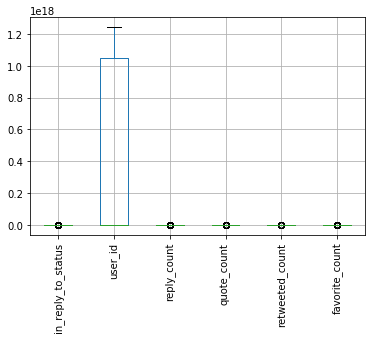

In [23]:
dataframe.boxplot(rot=90)

In [30]:
#removing outlier
dataframe = dataframe.drop(['user_id'], axis=1)

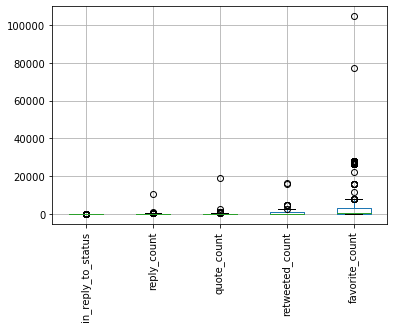

In [31]:
dataframe.boxplot(rot=90)

[]

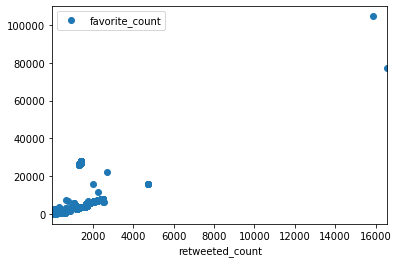

In [33]:
#finding relations beetwen variables
dataframe.plot(x="retweeted_count",y="favorite_count", style="o")
plt.plot()

[]

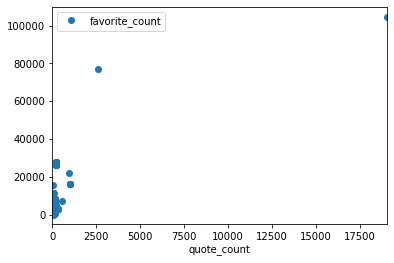

In [34]:
#finding relations beetwen variables
dataframe.plot(x="quote_count",y="favorite_count", style="o")
plt.plot()

[]

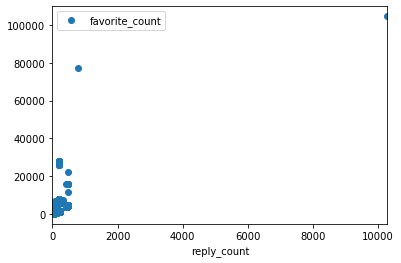

In [35]:
#finding relations beetwen variables
dataframe.plot(x="reply_count",y="favorite_count", style="o")
plt.plot()

[]

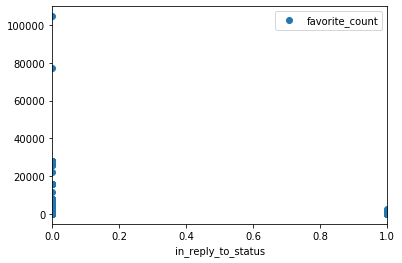

In [36]:
#finding relations beetwen variables
dataframe.plot(x="in_reply_to_status",y="favorite_count", style="o")
plt.plot()

In [59]:
#trying to remove some outliers
outliers = []
for index, row in dataframe.iterrows():
    if row['favorite_count'] > 10000:
          outliers.append(index)

In [60]:
dataframe = dataframe.drop(outliers)

In [61]:
len(dataframe)

4294

[]

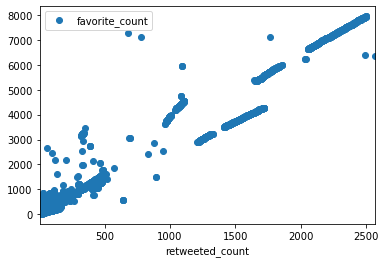

In [62]:
dataframe.plot(x="retweeted_count",y="favorite_count", style="o")
plt.plot()

In [65]:
#testing a simple linear regretion
X = dataframe['retweeted_count'].values.reshape(-1,1)
y = dataframe['favorite_count'].values.reshape(-1,1)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [67]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
print(regressor.intercept_)

[18.98162066]


In [69]:
print(regressor.coef_)

[[3.05436079]]


In [70]:
y_pred = regressor.predict(X_test)

In [71]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,0,22.035981
1,47,104.503723
2,992,1005.540157
3,2193,632.908140
4,30,40.362146
...,...,...
854,0,22.035981
855,454,367.178751
856,3988,4918.176332
857,9,25.090342


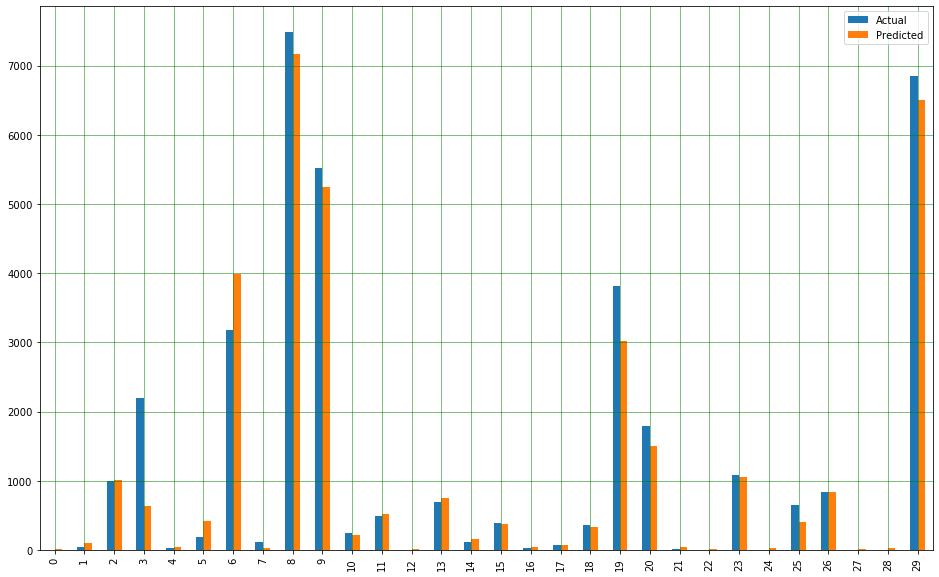

In [76]:
df1 = df.head(30)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()